In [92]:
import numpy as np

In [218]:
import pymc3 as pm

In [246]:
from random import choices

In [179]:
import seaborn as sns

In [55]:
from scipy.stats import binom,beta,uniform

In [207]:
sns.set_style(style="whitegrid")
sns.set_palette("dark")

Grid Search
1. get posterior from binomial likelihood and uniform prior
2. take finite possible priors and get the posterior for it.
3. sample from the prior

In [237]:
coin_toss = binom(n=10,p=0.3)

In [238]:
sample_data = coin_toss.rvs(1)

In [239]:
sample_data

array([3])

In [131]:
coin_prob = uniform(0,1)

In [240]:
grid_points = np.arange(0,10000)/10000.0

In [241]:
likelihood = binom.pmf(sample_data,p=grid_points,n=10)

In [242]:
posterior_tmp = likelihood*grid_points

In [243]:
posterior = posterior_tmp/sum(posterior_tmp)

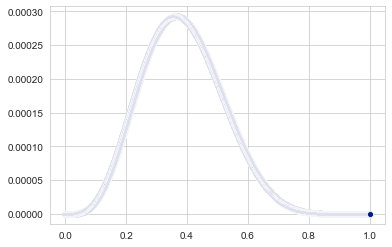

In [245]:
sns.scatterplot(grid_points,posterior)

In [248]:
sample = choices(population=grid_points,weights=posterior,k=100)

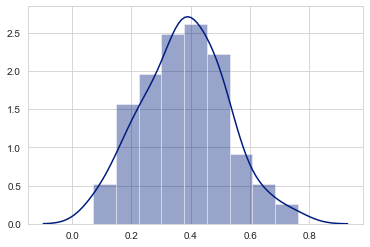

In [249]:
sns.distplot(sample)

In [219]:
tmp = pm.distributions.Binomial.dist(n=5,p=0.6)

In [234]:
tmp.random()

array(2)

In [254]:
pm.stats.hpd(np.array(sample))

array([0.1246, 0.6646])